## Trafik Kazaları 2012-2014 Veri Analizi

Aylin Özkan Keleş

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Dataseti içeri almak için:

from google.colab import files

uploaded = files.upload()

Saving accidents_2012_to_2014.csv to accidents_2012_to_2014.csv


In [4]:
tk=pd.read_csv("accidents_2012_to_2014.csv")

/tmp/ipython-input-4-2241214840.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  tk=pd.read_csv("accidents_2012_to_2014.csv")


In [5]:
tk.shape

(464697, 33)

In [6]:
tk.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002890,2012


In [8]:
tk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464697 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               464697 non-null  object 
 1   Location_Easting_OSGR                        464697 non-null  int64  
 2   Location_Northing_OSGR                       464697 non-null  int64  
 3   Longitude                                    464697 non-null  float64
 4   Latitude                                     464697 non-null  float64
 5   Police_Force                                 464697 non-null  int64  
 6   Accident_Severity                            464697 non-null  int64  
 7   Number_of_Vehicles                           464697 non-null  int64  
 8   Number_of_Casualties                         464697 non-null  int64  
 9   Date                                         464697 non-nul

In [9]:
# Eksik verileri görmek için
tk.isnull().sum()

,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0


-Fazlaca eksik veri bulunmakta.

In [10]:
# Eksik veri işlemleri

tk = tk.drop(columns=["Junction_Detail"])  # Tamamen boş olduğu için çıkarıldı

# Orta düzeyde eksik olan sütunları "Unknown" ile dolduralım
tk["Junction_Control"] = tk["Junction_Control"].fillna("Unknown")
tk["Road_Surface_Conditions"] = tk["Road_Surface_Conditions"].fillna("Unknown")
tk["Special_Conditions_at_Site"] = tk["Special_Conditions_at_Site"].fillna("Unknown")
tk["Carriageway_Hazards"] = tk["Carriageway_Hazards"].fillna("Unknown")
tk["Did_Police_Officer_Attend_Scene_of_Accident"] = tk["Did_Police_Officer_Attend_Scene_of_Accident"].fillna("Unknown")

# Çok az eksik olan saat bilgilerini gece 00:00 olarak dolduralım
tk["Time"] = tk["Time"].fillna("00:00")

# Veri seti artık eksiksiz
print("Veri temizliği tamamlandı. Yeni boyut:", tk.shape)


Veri temizliği tamamlandı. Yeni boyut: (464697, 32)


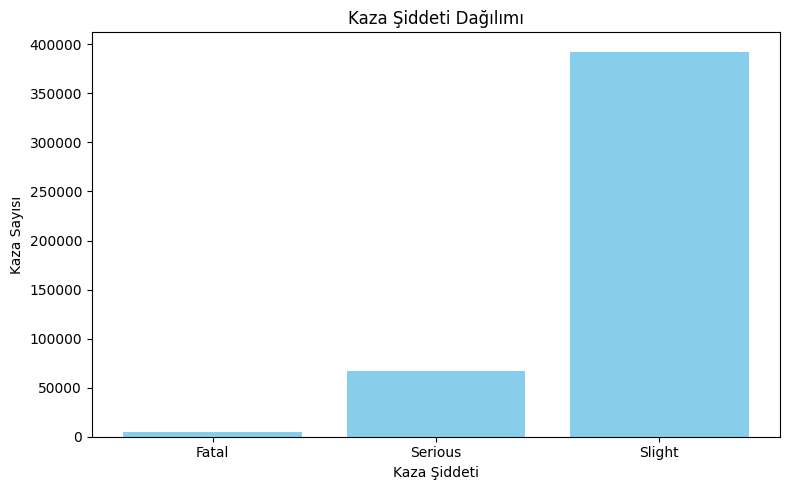

In [11]:
# Kaza şiddeti dağılımı
severity_counts = tk["Accident_Severity"].value_counts().sort_index()
severity_labels = {1: "Fatal", 2: "Serious", 3: "Slight"}
severity_names = [severity_labels[i] for i in severity_counts.index]

plt.figure(figsize=(8,5))
plt.bar(severity_names, severity_counts.values, color='skyblue')
plt.title("Kaza Şiddeti Dağılımı")
plt.xlabel("Kaza Şiddeti")
plt.ylabel("Kaza Sayısı")
plt.tight_layout()
plt.show()


- Kazaların çoğunluğu hafif atlatılmış.

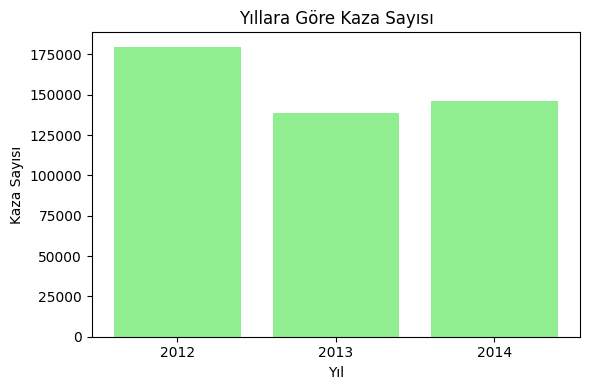

In [12]:
# 1. Yıllara göre kaza sayısı
yearly_counts = tk["Year"].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(yearly_counts.index.astype(str), yearly_counts.values, color='lightgreen')
plt.title("Yıllara Göre Kaza Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Kaza Sayısı")
plt.tight_layout()
plt.show()


- 2012 yılında kaza sayısı daha fazladır.

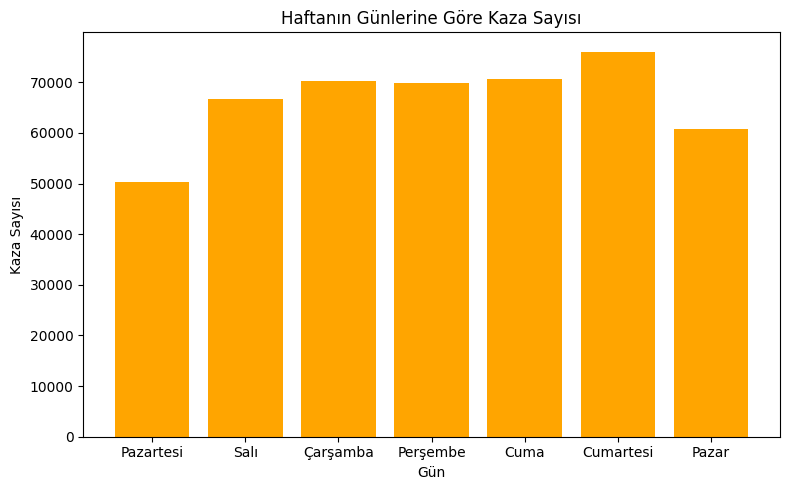

In [13]:
# 2. Haftanın günlerine göre kaza dağılımı
# 1 = Pazartesi, 2 = Salı, ...
gunler = {
    1: "Pazartesi",
    2: "Salı",
    3: "Çarşamba",
    4: "Perşembe",
    5: "Cuma",
    6: "Cumartesi",
    7: "Pazar"
}

day_counts = tk["Day_of_Week"].value_counts().sort_index()
day_names = [gunler.get(i, str(i)) for i in day_counts.index]

plt.figure(figsize=(8,5))
plt.bar(day_names, day_counts.values, color='orange')
plt.title("Haftanın Günlerine Göre Kaza Sayısı")
plt.xlabel("Gün")
plt.ylabel("Kaza Sayısı")
plt.tight_layout()
plt.show()


- En çok cumartesi günleri kaza olmaktadır.

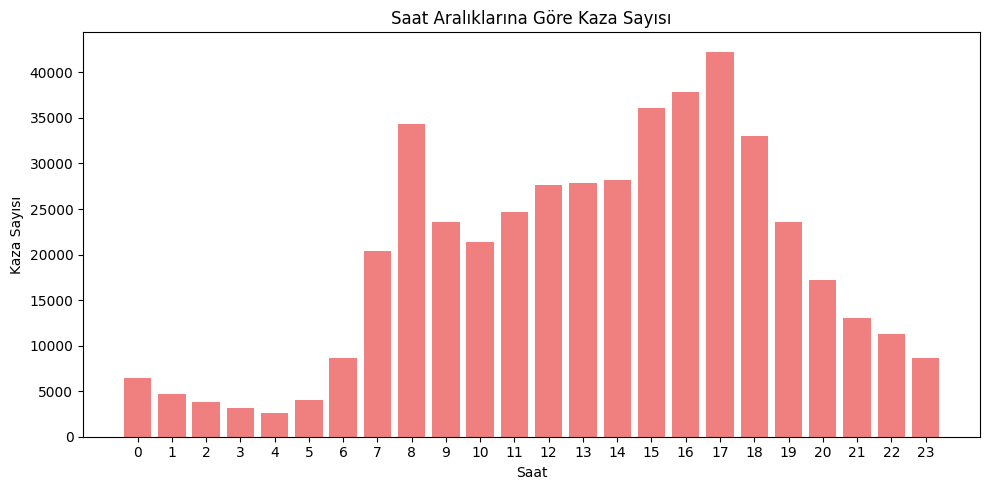

In [15]:
# Saat bilgisinden saat değerini çıkaralım
tk["Hour"] = tk["Time"].str[:2]  # "HH:MM" formatından saat al
tk["Hour"] = tk["Hour"].replace("  ", "00")  # Bazı boşluklu saatler olabilir
tk["Hour"] = pd.to_numeric(tk["Hour"], errors="coerce")  # Sayıya çevir

hourly_counts = tk["Hour"].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(hourly_counts.index.astype(int), hourly_counts.values, color='lightcoral')
plt.title("Saat Aralıklarına Göre Kaza Sayısı")
plt.xlabel("Saat")
plt.ylabel("Kaza Sayısı")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


- En çok saat 08.00 (İş/okula gidiş saati) ve 17.00 (İş/okul çıkış saati) saatlerinde kazalar yaşanmıştır.

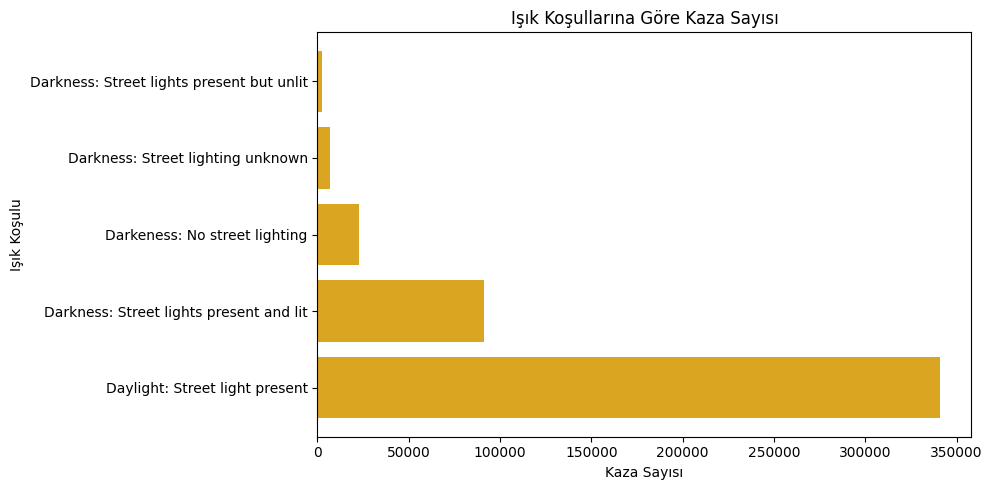

In [16]:
# Işık koşullarına göre kaza dağılımı
light_counts = tk["Light_Conditions"].value_counts()

plt.figure(figsize=(10,5))
plt.barh(light_counts.index, light_counts.values, color='goldenrod')
plt.title("Işık Koşullarına Göre Kaza Sayısı")
plt.xlabel("Kaza Sayısı")
plt.ylabel("Işık Koşulu")
plt.tight_layout()
plt.show()


- Kazaların çoğu gün ışığında gerçekleşmektedir.

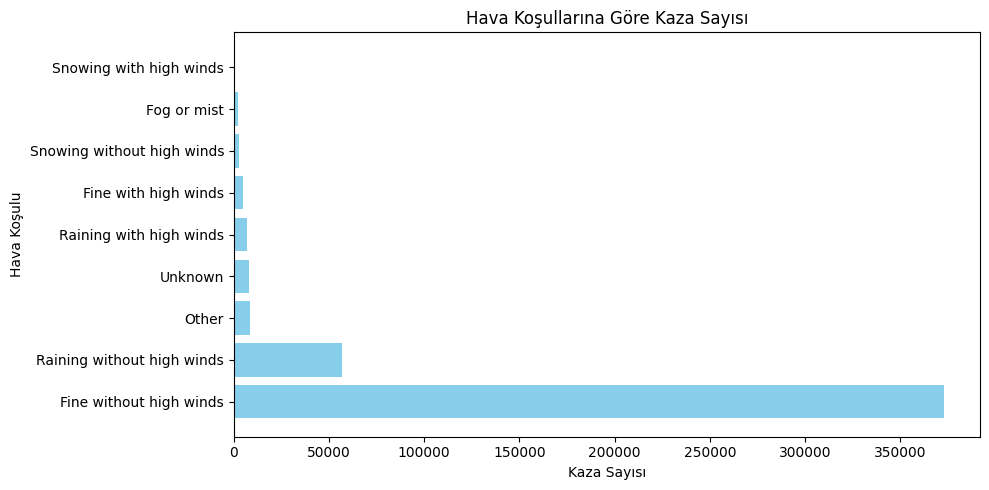

In [17]:
# Hava koşullarına göre kaza dağılımı
weather_counts = tk["Weather_Conditions"].value_counts()

plt.figure(figsize=(10,5))
plt.barh(weather_counts.index, weather_counts.values, color='skyblue')
plt.title("Hava Koşullarına Göre Kaza Sayısı")
plt.xlabel("Kaza Sayısı")
plt.ylabel("Hava Koşulu")
plt.tight_layout()
plt.show()


- İyi ve rüzgarsız havalarda daha fazla kaza olmuştur.

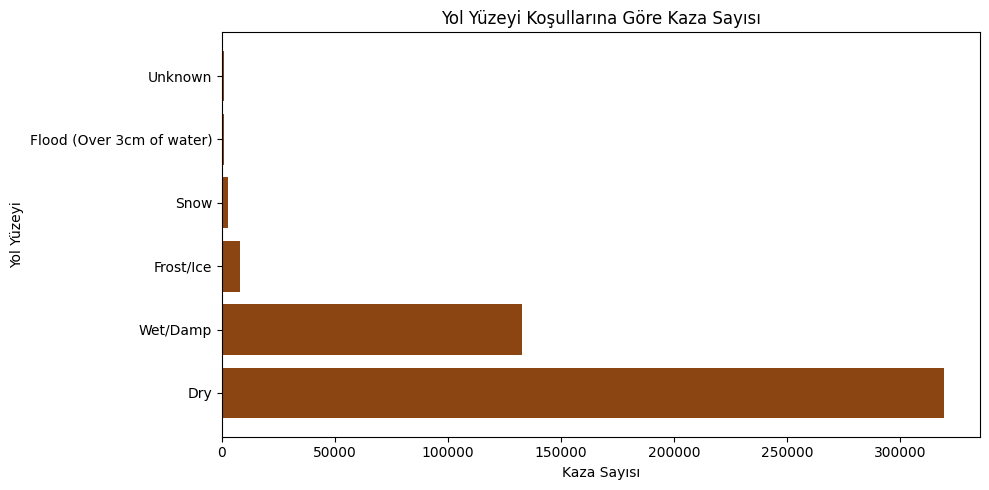

In [18]:
# Yol yüzeyi koşullarına göre kaza dağılımı
road_surface_counts = tk["Road_Surface_Conditions"].value_counts()

plt.figure(figsize=(10,5))
plt.barh(road_surface_counts.index, road_surface_counts.values, color='saddlebrown')
plt.title("Yol Yüzeyi Koşullarına Göre Kaza Sayısı")
plt.xlabel("Kaza Sayısı")
plt.ylabel("Yol Yüzeyi")
plt.tight_layout()
plt.show()


- Kuru yollarda daha fazla kazalar olmuştur.

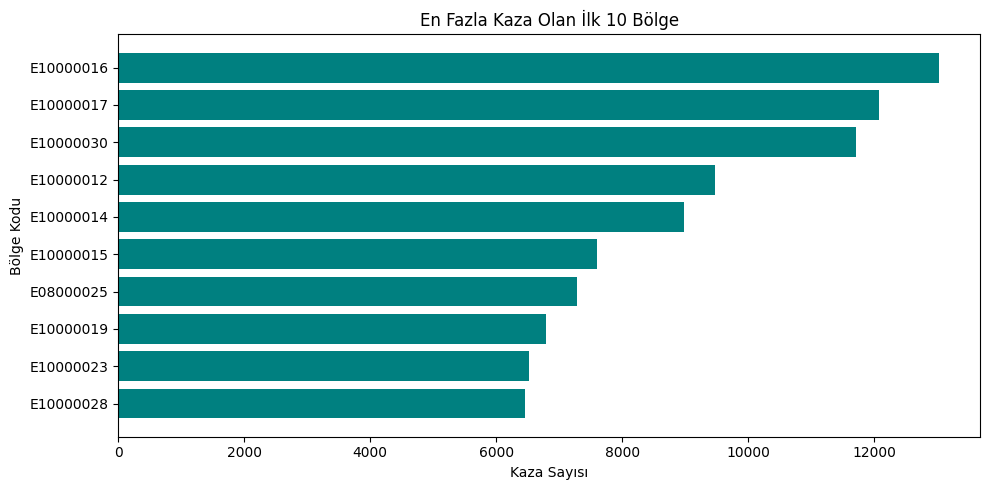

In [20]:
# En çok kazanın olduğu 10 bölge (şehir kodlarına göre)
top_regions = tk["Local_Authority_(Highway)"].value_counts().head(10)

plt.figure(figsize=(10,5))
plt.barh(top_regions.index[::-1], top_regions.values[::-1], color="teal")
plt.title("En Fazla Kaza Olan İlk 10 Bölge")
plt.xlabel("Kaza Sayısı")
plt.ylabel("Bölge Kodu")
plt.tight_layout()
plt.show()


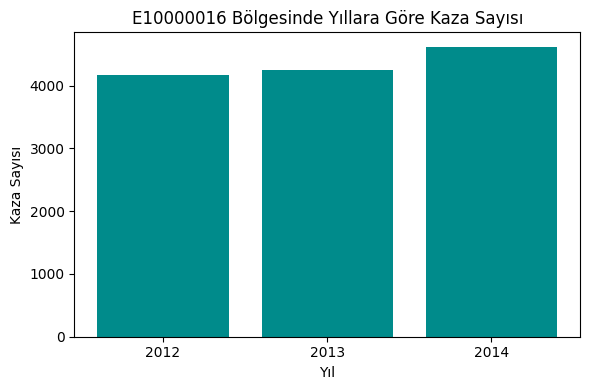

In [22]:
# E10000016 bölgesi için yıllara göre kaza sayısı analizi
ornek_bolge = "E10000016"
bolge_verisi = tk[tk["Local_Authority_(Highway)"] == ornek_bolge]

bolge_yillar = bolge_verisi["Year"].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(bolge_yillar.index.astype(str), bolge_yillar.values, color='darkcyan')
plt.title(f"{ornek_bolge} Bölgesinde Yıllara Göre Kaza Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Kaza Sayısı")
plt.tight_layout()
plt.show()
